In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math as m

In [3]:
mat = loadmat("ex4data1.mat")
X = mat["X"] #5000 x 400
X_pred = X
y = mat["y"]#5000 x ,
M = len(y)
#y[y == 10] = 0

weights = loadmat("ex4weights.mat")
theta1 = weights["Theta1"]#25 x 401
theta2 = weights["Theta2"]#10 x 26

In [4]:
nn_params = np.concatenate((theta1.flatten(), theta2.flatten()))
IL = 400
HL = 25
K = 10

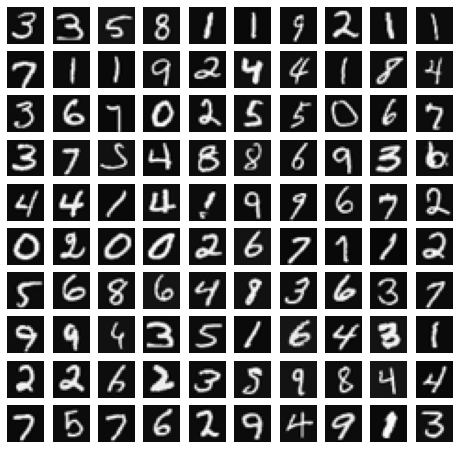

In [5]:
fig, axis = plt.subplots(10, 10, figsize = (8, 8))
plt.gray()
for i in range(10):
    for j in range(10):
        axis[i, j].imshow(X[np.random.randint(0, 5001),:].reshape(20,20, order = 'F'))
        axis[i, j].axis("off")

In [6]:
X = np.hstack((np.ones((M,1)), X))
Y = np.zeros((M,K))
for i, row in enumerate(Y):
    Y[i, y[i]-1] = 1

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
def predict(Theta1, Theta2, X):
    
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    a1 = sigmoid(np.dot(X, Theta1.T))
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(np.dot(a1, Theta2.T)) # output layer
    
    return np.argmax(a2,axis=1)+1

In [9]:
def sigmoid_g(x):
    return sigmoid(x) * (1-sigmoid(x))

In [10]:
def randominit(Lin, Lout):
    
    epi = m.sqrt(6) / m.sqrt(Lin + Lout)
    
    W = np.random.rand(Lout, 1 + Lin) * (2*epi) - epi

    return W

In [11]:
def NNCostFunction(nn_params, IS, HL, K, X, Y, lbda):
    theta1 = nn_params[: HL*(IS+1)].reshape(HL, IS+1)
    theta2 = nn_params[(IS+1)*HL :].reshape(K, HL+1)

    a1 = X

    z2 = np.dot(theta1, a1.T)
    a2 = sigmoid(z2)
    a2 = np.append(np.ones((1,M)), a2, axis = 0)

    z3 = a2.T
    a3 = np.dot(theta2, z3.T)
    a3 = sigmoid(a3)

    a3 = a3.T
    a2 = a2.T
    c = 0

    for i in range(K):
        c = c + np.sum(-Y[:,i].dot(np.log(a3[:,i])) - (1-Y[:,i]).dot(np.log(1-a3[:,i])))

    reg = lbda/(2*M) * (np.sum(theta1[:,1:]**2) + np.sum(theta2[:,1:]**2))
    
    J = c/M + reg

    grad1 = np.zeros((theta1.shape))
    grad2 = np.zeros((theta2.shape))

    for i in range(M):
        a1_layer = X[i, :]
        a2_layer = a2[i, :]
        a3_layer = a3[i, :]

        d3 = a3_layer - Y[i, :].T
        Z = np.hstack((1, np.dot(a1_layer, theta1.T)))
        d2 = np.dot(d3, theta2) * sigmoid_g(Z)

        #newaxis converts it from size X, to size X,1
        d3 = d3[:, np.newaxis]
        a2_layer = a2_layer[:, np.newaxis]
        a1_layer = a1_layer[:, np.newaxis]

        grad1 = grad1 + np.dot(d2[1:][:, np.newaxis], a1_layer.T)
        grad2 = grad2 + np.dot(d3, a2_layer.T)

    grad1 = grad1/M
    grad2 = grad2/M

    grad1_reg = grad1 + (lbda/M) *  np.hstack((np.zeros((theta1.shape[0],1)),theta1[:,1:]))
    grad2_reg = grad2 + (lbda/M) *  np.hstack((np.zeros((theta2.shape[0],1)),theta2[:,1:]))
        
    return J, grad1, grad2

In [12]:
def NNGradientDescent(X, Y, init_params, alpha, iters, lbda, IL, HL, K):
    theta1 = init_params[: HL*(IL+1)].reshape(HL, IL+1)
    theta2 = init_params[(IL+1)*HL :].reshape(K, HL+1)

    J_h = []

    for i in range(iters):
        nn_params = np.append(theta1.flatten(),theta2.flatten())
        cost, grad1, grad2 = NNCostFunction(nn_params,IL, HL, K, X, Y,lbda)
        theta1 = theta1 - (alpha*grad1)
        theta2 = theta2 - (alpha*grad2)
        J_h.append(cost)

    final_para = np.append(theta1.flatten(), theta2.flatten())

    return final_para, J_h

In [13]:
init_theta1 = randominit(IL, HL)
init_theta2 = randominit(HL, K)
init_params = np.append(init_theta1.flatten(),init_theta2.flatten())

In [14]:
NNtheta, NNJ_h = NNGradientDescent(X, Y, init_params, 2, 800, 2, IL, HL, K)
theta1_new = NNtheta[:((IL+1) * HL)].reshape(HL,IL+1)
theta2_new = NNtheta[((IL +1)* HL ):].reshape(K,HL+1)

In [15]:
pred2 = predict(theta1_new, theta2_new, X_pred)
print("Training Set Accuracy:",sum(pred2[:,np.newaxis]==y)[0]/5000*100,"%")

Training Set Accuracy: 96.66 %


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, pred2)

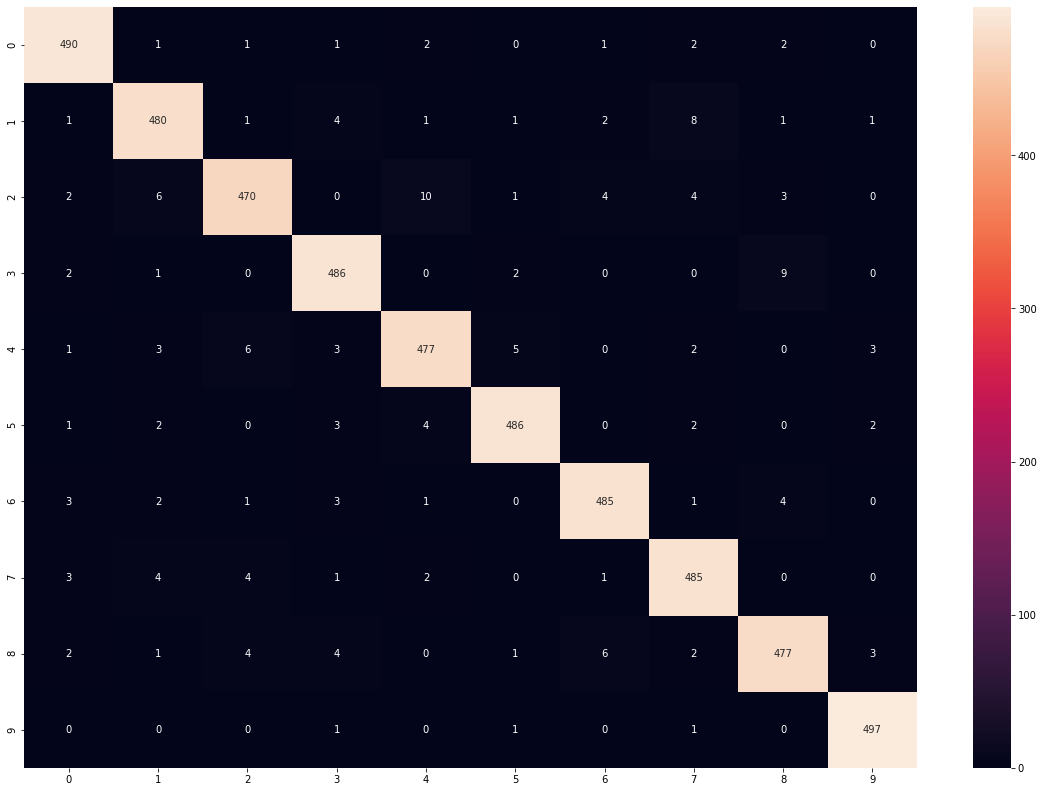

In [17]:
import seaborn as sn
plt.figure(figsize = (20,14))
sn.heatmap(cm, annot = True, fmt = 'g')
plt.show()

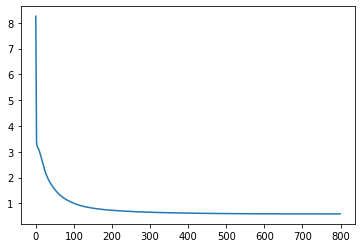

In [26]:
plt.plot(np.arange(800), np.array(NNJ_h))
plt.show()